In [ ]:
### HW14 DSP
# the plots are located in this ipynb towards the end of the script

In [ ]:
import csv

### READING CSV FILES

def read_csv(filename):
    t = []
    data = []
    with open(filename) as f:
    # open the csv file
        reader = csv.reader(f)
        for row in reader:
            # read the rows 1 one by one
            t.append(float(row[0])) # leftmost column
            data.append(float(row[1])) # second column
    return t, data

tA, dataA = read_csv('sigA.csv')
tB, dataB = read_csv('sigB.csv')
tC, dataC = read_csv('sigC.csv')
tD, dataD = read_csv('sigD.csv')

# for i in range(len(tA)):
    # print the data to verify it was read
#     print(str(tA[i]) + ", " + str(dataA[i]))

In [ ]:
import matplotlib.pyplot as plt # for plotting

### PLOTTING SIGNALS

def plot_signals(t, data, title, color, shape, markersize):
    plt.plot(t, data, color+shape, markersize = markersize)
    plt.xlabel('Time [s]')
    plt.ylabel('Signal')
    plt.title(title)
    plt.show()
    
plot_signals(tA, dataA, 'Signal A vs Time', 'b', '-*', markersize = 1)
plot_signals(tB, dataB, 'Signal B vs Time', 'g', '-*', markersize = 1)
plot_signals(tC, dataC, 'Signal C vs Time', 'r', '-*', markersize = 1)
plot_signals(tD, dataD, 'Signal D vs Time', 'y', '-*', markersize = 1)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

### PLOTTING FFT

def plot_fft(sample_rate, t, data, title, color):
    Fs = sample_rate # sample rate
    Ts = 1.0/Fs; # sampling interval
    ts = np.arange(0,t[-1],Ts) # time vector
    y = data # the data to make the fft from
    n = len(y) # length of the signal
    k = np.arange(n)
    T = n/Fs
    frq = k/T # two sides frequency range
    frq = frq[range(int(n/2))] # one side frequency range
    Y = np.fft.fft(y)/n # fft computing and normalization
    Y = Y[range(int(n/2))]

    fig, (ax1, ax2) = plt.subplots(2, 1)
    ax1.plot(t,y,color)
    ax1.set_xlabel('Time')
    ax1.set_ylabel('Amplitude')
    ax2.loglog(frq,abs(Y),color) # plotting the fft
    ax2.set_xlabel('Freq (Hz)')
    ax2.set_ylabel('|Y(freq)|')
    fig.suptitle(title)
    plt.show()

    
plot_fft(10000, tA, dataA, 'Signal A', 'b')
plot_fft(10000, tB, dataB, 'Signal B', 'g')
plot_fft(10000, tC, dataC, 'Signal C', 'r')
plot_fft(10000, tD, dataD, 'Signal D', 'y')

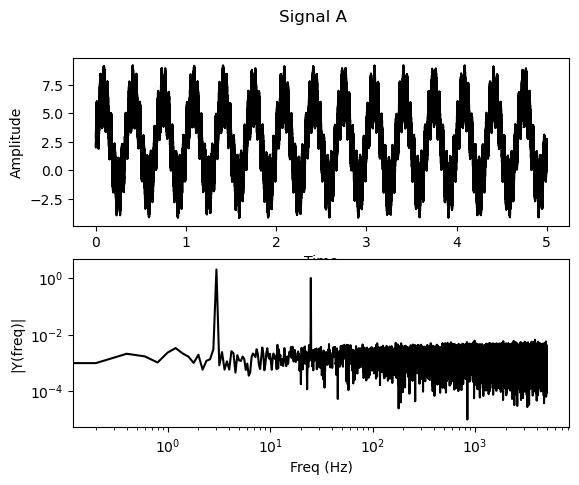

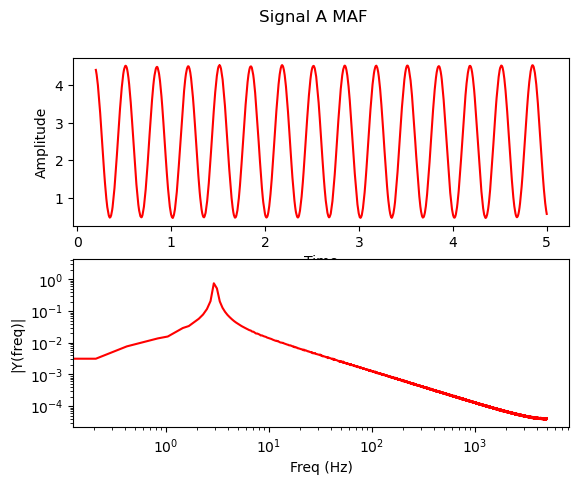

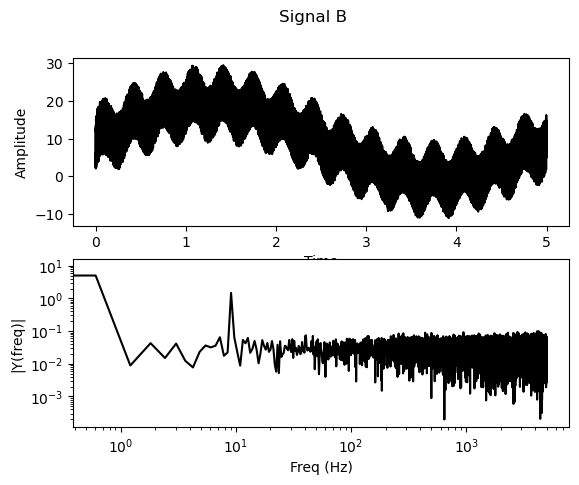

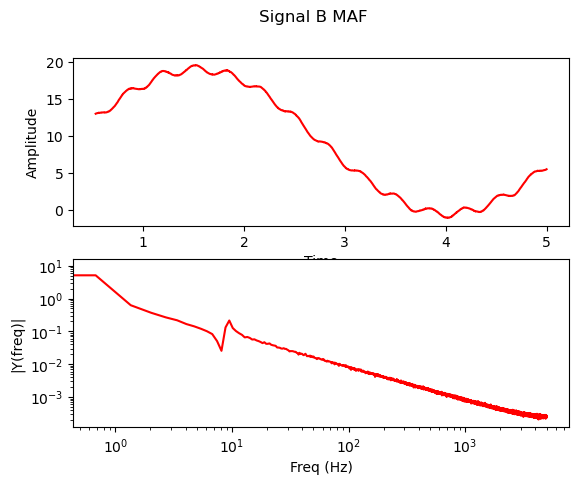

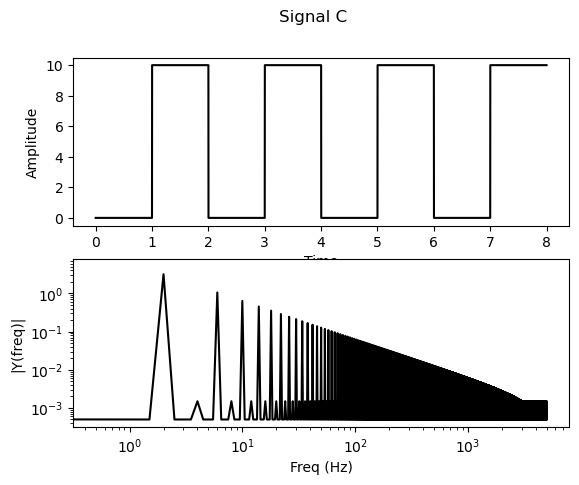

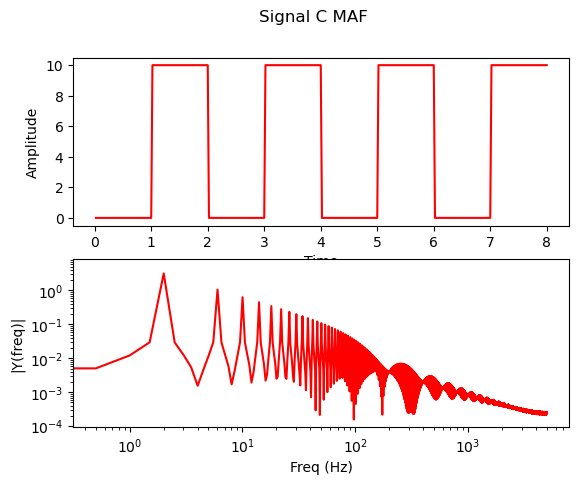

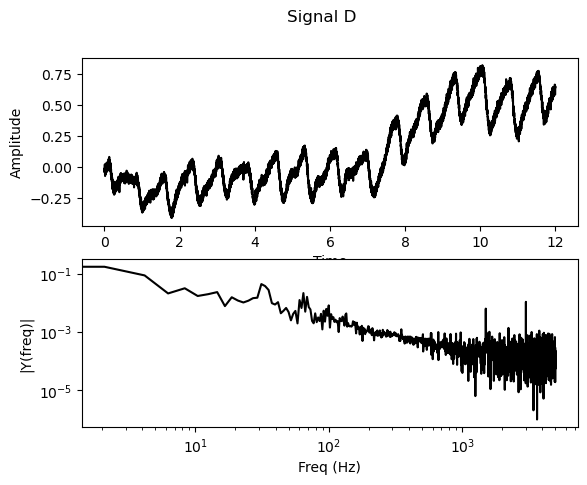

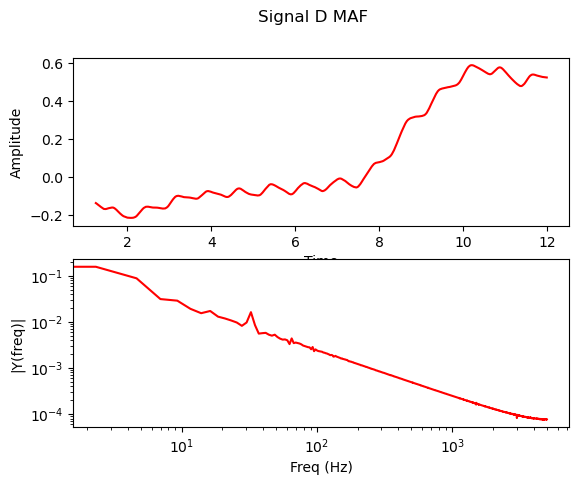

In [35]:
### MOVING AVERAGE FILTER, modified for better plots

def calc_maf(t, data, x):
    data_maf = [] # empty array to store maf values
    t_maf = [] # empty array to store trimmed t range
    for i in range(len(t) - x + 1):
        maf = sum(data[i:i+x])/x
        data_maf.append(maf)
        t_maf.append(t[i + x - 1])
    return t_maf, data_maf

def plot_fft(sample_rate, t, data, title):
    Fs = sample_rate # sample rate
    Ts = 1.0/Fs; # sampling interval
    ts = np.arange(0,t[-1],Ts) # time vector
    y = data # the data to make the fft from
    n = len(y) # length of the signal
    k = np.arange(n)
    T = n/Fs
    frq = k/T # two sides frequency range
    frq = frq[range(int(n/2))] # one side frequency range
    Y = np.fft.fft(y)/n # fft computing and normalization
    Y = Y[range(int(n/2))]

    fig, (ax1, ax2) = plt.subplots(2, 1)
    ax1.plot(t,y,'k')
    ax1.set_xlabel('Time')
    ax1.set_ylabel('Amplitude')
    ax2.loglog(frq,abs(Y),'k') # plotting the fft
    ax2.set_xlabel('Freq (Hz)')
    ax2.set_ylabel('|Y(freq)|')
    fig.suptitle(title)
    plt.show()

def plot_fft_maf(sample_rate, t_maf, data_maf, title):
    Fs = sample_rate # sample rate
    Ts = 1.0/Fs; # sampling interval
    ts_maf = np.arange(0,t_maf[-1],Ts) # time vector
    y_maf = data_maf # the data to make the fft from
    n_maf = len(y_maf) # length of the signal
    k_maf = np.arange(n_maf)
    T_maf = n_maf/Fs
    frq_maf = k_maf/T_maf # two sides frequency range
    frq_maf = frq_maf[range(int(n_maf/2))] # one side frequency range
    Y_maf = np.fft.fft(y_maf)/n_maf # fft computing and normalization
    Y_maf = Y_maf[range(int(n_maf/2))]

    fig, (ax1, ax2) = plt.subplots(2, 1)
    ax1.plot(t_maf,y_maf,'r')
    ax1.set_xlabel('Time')
    ax1.set_ylabel('Amplitude')
    ax2.loglog(frq_maf,abs(Y_maf),'r') # plotting the fft
    ax2.set_xlabel('Freq (Hz)')
    ax2.set_ylabel('|Y(freq)|')
    fig.suptitle(title)
    plt.show()

tA_maf, dataA_maf = calc_maf(tA, dataA, 2000)
plot_fft(10000, tA, dataA, 'Signal A')
plot_fft_maf(10000, tA_maf, dataA_maf, 'Signal A MAF with 2000 window')

tB_maf, dataB_maf = calc_maf(tB, dataB, 1750)
plot_fft(10000, tB, dataB, 'Signal B')
plot_fft_maf(10000, tB_maf, dataB_maf, 'Signal B MAF with 1750 window')

tC_maf, dataC_maf = calc_maf(tC, dataC, 50)
plot_fft(10000, tC, dataC, 'Signal C')
plot_fft_maf(10000, tC_maf, dataC_maf, 'Signal C MAF with 50 window')

tD_maf, dataD_maf = calc_maf(tD, dataD, 500)
plot_fft(10000, tD, dataD, 'Signal D')
plot_fft_maf(10000, tD_maf, dataD_maf, 'Signal D MAF with 500 window')

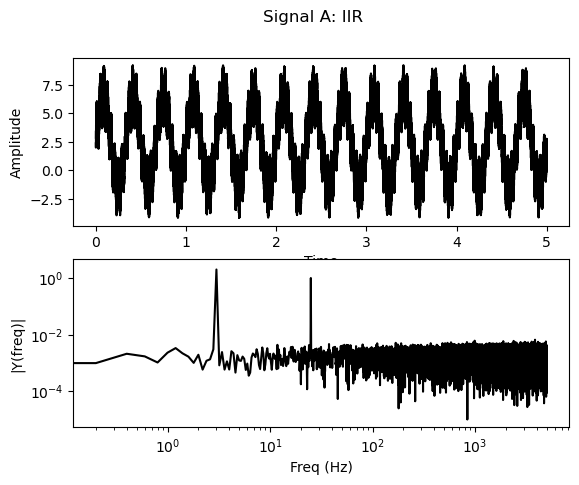

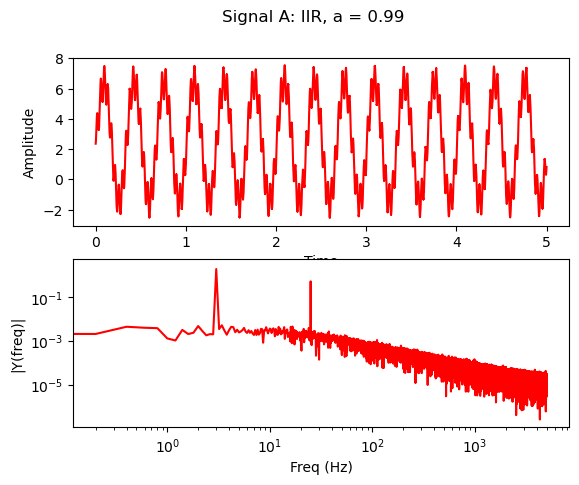

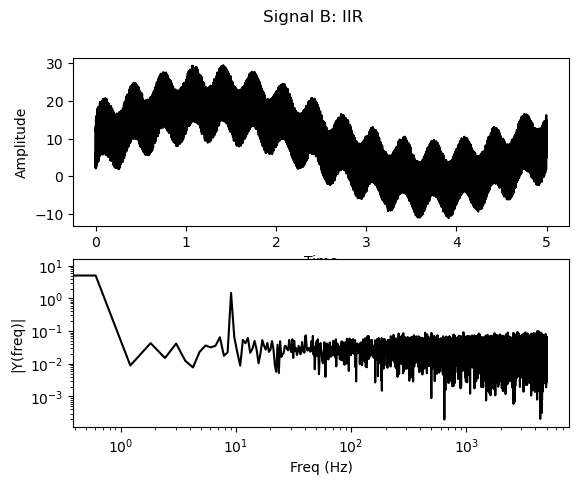

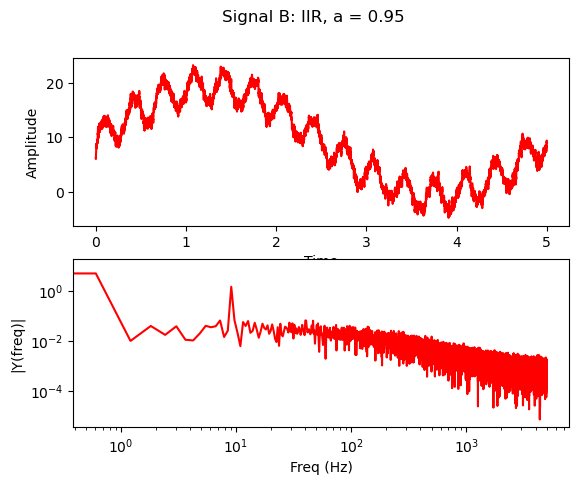

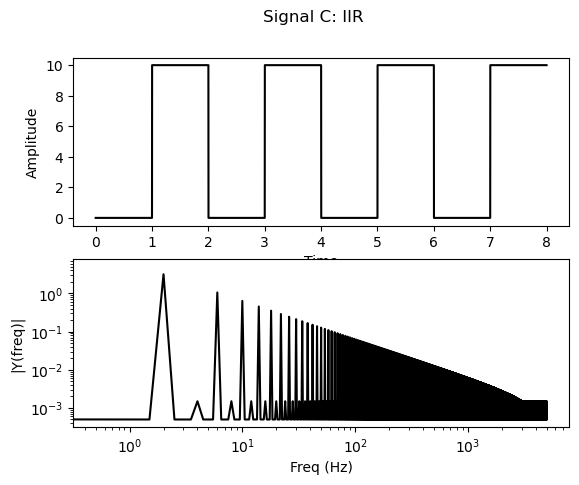

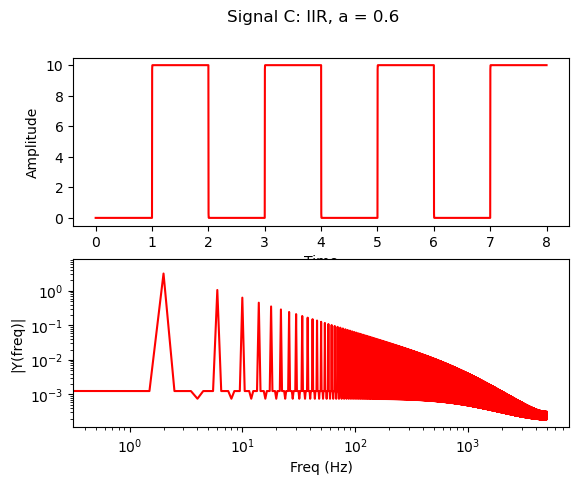

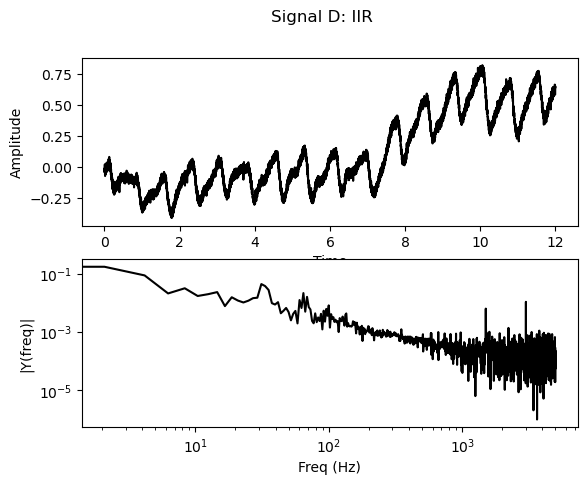

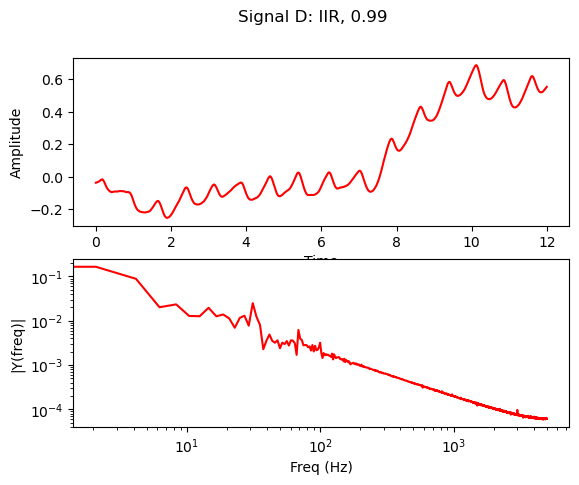

In [51]:
### INFINITE IMPULSE RESPONSE

def calc_iir(t, data, a, b):
    data_iir = [data[0]] # empty array to store iir values
    for i in range(1, len(t)):
        iir = a*data_iir[i-1] + b*data[i]
        data_iir.append(iir)
    return data_iir

def plot_iir(sample_rate, t, data, title):
    Fs = sample_rate # sample rate
    Ts = 1.0/Fs; # sampling interval
    ts = np.arange(0,t[-1],Ts) # time vector
    y = data # the data to make the fft from
    n = len(y) # length of the signal
    k = np.arange(n)
    T = n/Fs
    frq = k/T # two sides frequency range
    frq = frq[range(int(n/2))] # one side frequency range
    Y = np.fft.fft(y)/n # fft computing and normalization
    Y = Y[range(int(n/2))]
    
    fig, (ax1, ax2) = plt.subplots(2, 1)

    ax1.plot(t,data, 'k')
    ax1.set_xlabel('Time')
    ax1.set_ylabel('Amplitude')
    
    ax2.loglog(frq,abs(Y),'k') # plotting the fft for unfiltered data
    ax2.set_xlabel('Freq (Hz)')
    ax2.set_ylabel('|Y(freq)|')

    fig.suptitle(title)
    plt.show()
    
def plot_fft_iir(sample_rate, t, data_iir, title):
    Fs = sample_rate # sample rate
    Ts = 1.0/Fs; # sampling interval
    ts = np.arange(0,t[-1],Ts) # time vector
    y = data_iir # the data to make the fft from
    n = len(y) # length of the signal
    k = np.arange(n)
    T = n/Fs
    frq = k/T # two sides frequency range
    frq = frq[range(int(n/2))] # one side frequency range
    Y = np.fft.fft(y)/n # fft computing and normalization
    Y = Y[range(int(n/2))]
    
    y_iir = data_iir # the data to make the fft from
    Y_iir = np.fft.fft(y_iir)/n # fft computing and normalization
    Y_iir = Y_iir[range(int(n/2))]

    fig, (ax1, ax2) = plt.subplots(2, 1)
    
    ax1.plot(t,data_iir, 'r')
    ax1.set_xlabel('Time')
    ax1.set_ylabel('Amplitude')
    
    ax2.loglog(frq,abs(Y_iir),'r') # plotting the fft for IIR
    ax2.set_xlabel('Freq (Hz)')
    ax2.set_ylabel('|Y(freq)|')
    
    fig.suptitle(title)
    plt.show()
    
    
a_A = 0.99
b_A = 1 - a_A
dataA_iir = calc_iir(tA, dataA, a_A, b_A)
plot_iir(10000, tA, dataA, 'Signal A: IIR')
plot_fft_iir(10000, tA, dataA_iir, 'Signal A: IIR, a = 0.99')

a_B = 0.95
b_B = 1 - a_B
dataB_iir = calc_iir(tB, dataB, a_B, b_B)
plot_iir(10000, tB, dataB, 'Signal B: IIR')
plot_fft_iir(10000, tB, dataB_iir, 'Signal B: IIR, a = 0.95')

a_C = 0.6
b_C = 1 - a_C
dataC_iir = calc_iir(tC, dataC, a_C, b_C)
plot_iir(10000, tC, dataC, 'Signal C: IIR')
plot_fft_iir(10000, tC, dataC_iir, 'Signal C: IIR, a = 0.6')

a_D = 0.99
b_D = 1 - a_D
dataD_iir = calc_iir(tD, dataD, a_D, b_D)
plot_iir(10000, tD, dataD, 'Signal D: IIR')
plot_fft_iir(10000, tD, dataD_iir, 'Signal D: IIR, 0.99')

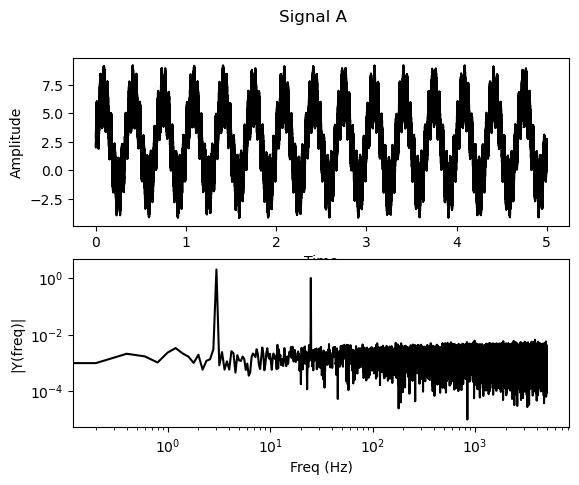

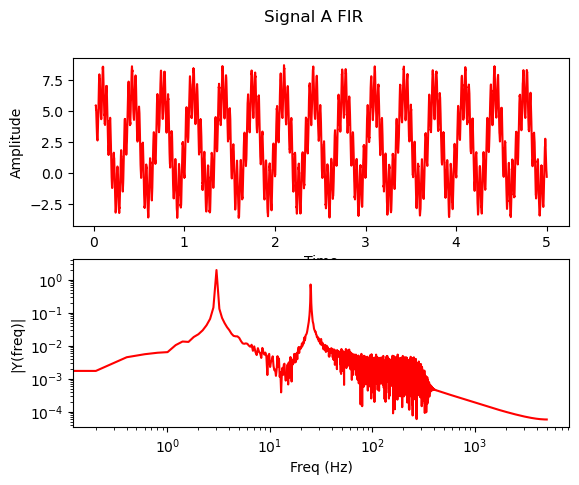

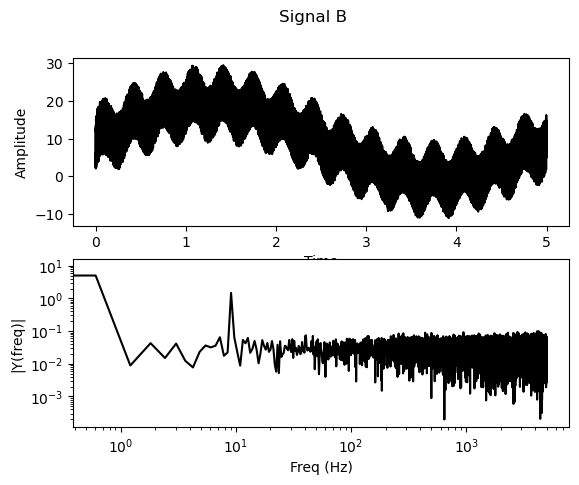

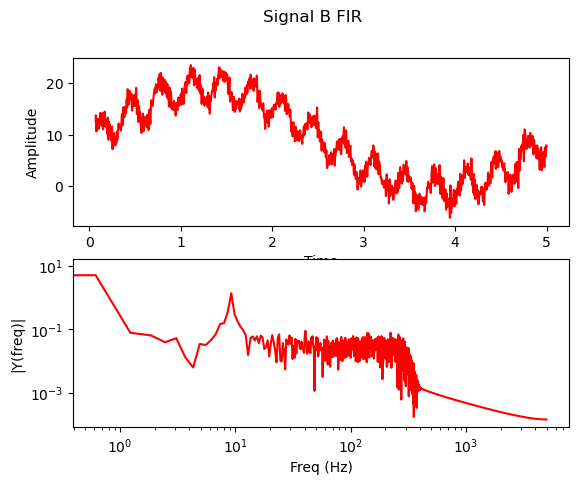

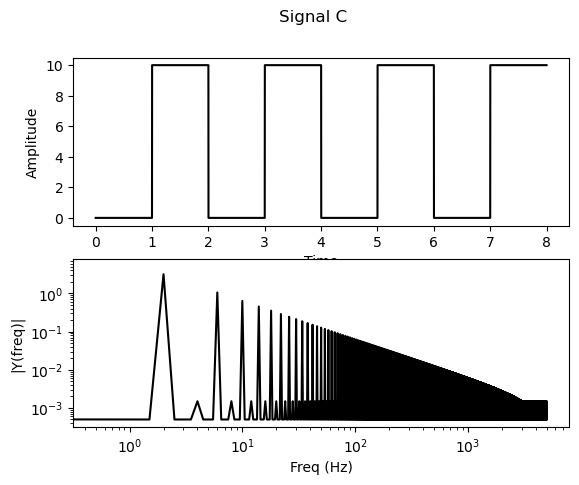

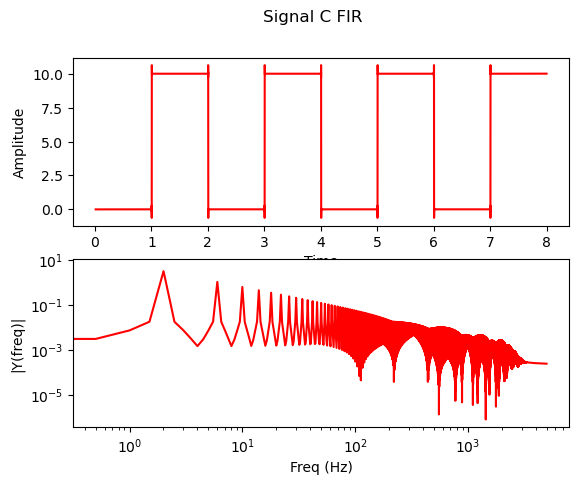

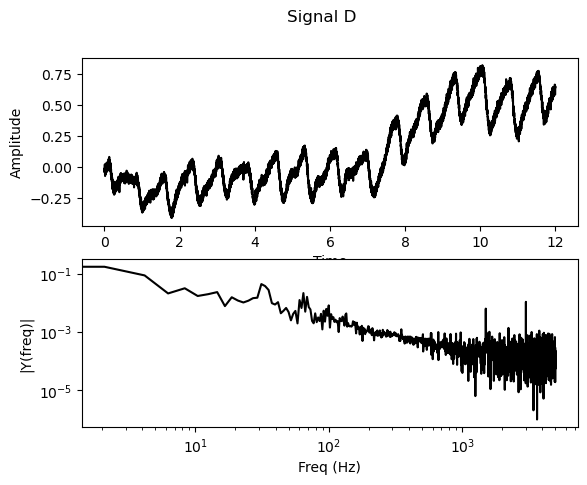

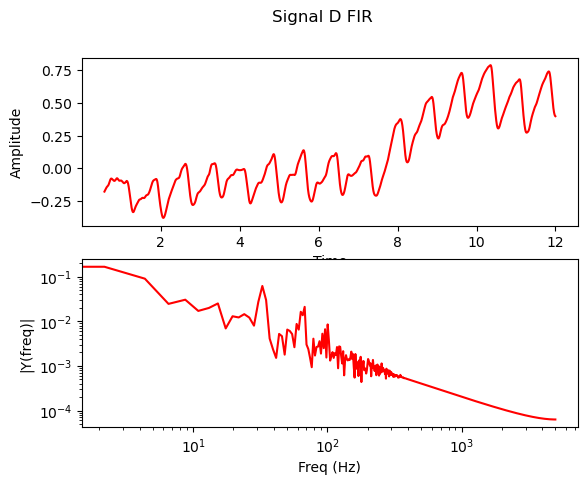

In [46]:
### FINITE IMPULSE RESPONSE

def calc_fir(coeff, t, data):
    data_fir = [] 
    t_fir = []
    x = len(coeff)
    for i in range(len(t) - x + 1):
        fir = 0
        for j in range(x):
            fir += coeff[j]*data[i + j]
        data_fir.append(fir)
        t_fir.append(t[i + x - 1])
    return data_fir, t_fir

def plot_fft_fir(sample_rate, t_fir, data_fir, title):
    Fs = sample_rate # sample rate
    Ts = 1.0/Fs; # sampling interval
    ts_fir = np.arange(0,t_fir[-1],Ts) # time vector
    y_fir = data_fir # the data to make the fft from
    n_fir = len(y_fir) # length of the signal
    k_fir = np.arange(n_fir)
    T_fir = n_fir/Fs
    frq_fir = k_fir/T_fir # two sides frequency range
    frq_fir = frq_fir[range(int(n_fir/2))] # one side frequency range
    Y_fir = np.fft.fft(y_fir)/n_fir # fft computing and normalization
    Y_fir = Y_fir[range(int(n_fir/2))]

    fig, (ax1, ax2) = plt.subplots(2, 1)
    ax1.plot(t_fir,y_fir,'r')
    ax1.set_xlabel('Time')
    ax1.set_ylabel('Amplitude')
    ax2.loglog(frq_fir,abs(Y_fir),'r') # plotting the fft
    ax2.set_xlabel('Freq (Hz)')
    ax2.set_ylabel('|Y(freq)|')
    fig.suptitle(title)
    plt.show()

dataA_fir, tA_fir = calc_fir(coeffA, tA, dataA)
plot_fft(10000, tA, dataA, 'Signal A')
plot_fft_fir(10000, tA_fir, dataA_fir, 'Signal A FIR')

dataB_fir, tB_fir = calc_fir(coeffA, tB, dataB)
plot_fft(10000, tB, dataB, 'Signal B')
plot_fft_fir(10000, tB_fir, dataB_fir, 'Signal B FIR')

dataC_fir, tC_fir = calc_fir(coeffC, tC, dataC)
plot_fft(10000, tC, dataC, 'Signal C')
plot_fft_fir(10000, tC_fir, dataC_fir, 'Signal C FIR')

dataD_fir, tD_fir = calc_fir(coeffA, tD, dataD)
plot_fft(10000, tD, dataD, 'Signal D')
plot_fft_fir(10000, tD_fir, dataD_fir, 'Signal D FIR')

In [45]:
### Coefficients for the FIR, put at top because it's so long

coeffA = [
    0.000000000000000000,
    0.000000090380047562,
    0.000000482961992692,
    0.000001327060276504,
    0.000002712393548005,
    0.000004652586834797,
    0.000007073661245876,
    0.000009808587683855,
    0.000012598705062227,
    0.000015102471388495,
    0.000016911637706439,
    0.000017574522971500,
    0.000016625637866607,
    0.000013620475290435,
    0.000008173874865335,
    0.000000000000000000,
    -0.000011048338725179,
    -0.000024943498536064,
    -0.000041452553740691,
    -0.000060115161066386,
    -0.000080232169058381,
    -0.000100867097411073,
    -0.000120862159475959,
    -0.000138869903623577,
    -0.000153400820624296,
    -0.000162886427543543,
    -0.000165756425297347,
    -0.000160527576522054,
    -0.000145901009201045,
    -0.000120863771148282,
    -0.000084789695492382,
    -0.000037534042519018,
    0.000020483989335563,
    0.000088216894758434,
    0.000163948445374268,
    0.000245282505047349,
    0.000329165484171806,
    0.000411945635981013,
    0.000489470885994972,
    0.000557225111000657,
    0.000610500809689902,
    0.000644604013688952,
    0.000655085170242884,
    0.000637987692341986,
    0.000590104031199405,
    0.000509227593570864,
    0.000394387711749868,
    0.000246054275822540,
    0.000066298637845787,
    -0.000141101944506609,
    -0.000370627709621963,
    -0.000615056985847291,
    -0.000865590630214938,
    -0.001112063683257727,
    -0.001343243847135481,
    -0.001547212284623447,
    -0.001711817946857299,
    -0.001825192356434776,
    -0.001876307703137640,
    -0.001855557462251598,
    -0.001755335727108458,
    -0.001570589251489276,
    -0.001299314993609215,
    -0.000942975877680112,
    -0.000506808635200921,
    0.000000000000000001,
    0.000564288802843121,
    0.001169064483742071,
    0.001793820335130752,
    0.002415033627422723,
    0.003006836878563342,
    0.003541850367063895,
    0.003992155471574069,
    0.004330380938448159,
    0.004530867347662731,
    0.004570869204399694,
    0.004431749542794901,
    0.004100118965188234,
    0.003568869876966889,
    0.002838057470211795,
    0.001915581839149165,
    0.000817630473711285,
    -0.000431152816237733,
    -0.001797797922380507,
    -0.003241452707556975,
    -0.004714145587275283,
    -0.006161858486521329,
    -0.007525889926390862,
    -0.008744475863642380,
    -0.009754624451454601,
    -0.010494110602994662,
    -0.010903567583521474,
    -0.010928606244741857,
    -0.010521888291281411,
    -0.009645078392039236,
    -0.008270601178149621,
    -0.006383133254447185,
    -0.003980767228424357,
    -0.001075794250317325,
    0.002304936629946841,
    0.006120110240347983,
    0.010314500956242178,
    0.014819988923386122,
    0.019557017097632010,
    0.024436453286924755,
    0.029361806249069040,
    0.034231731310750829,
    0.038942749478027928,
    0.043392095080919457,
    0.047480601015767648,
    0.051115527888831287,
    0.054213243970030849,
    0.056701666853303787,
    0.058522384973569687,
    0.059632387404840323,
    0.060005343294556653,
    0.059632387404840323,
    0.058522384973569687,
    0.056701666853303787,
    0.054213243970030855,
    0.051115527888831287,
    0.047480601015767655,
    0.043392095080919464,
    0.038942749478027928,
    0.034231731310750829,
    0.029361806249069040,
    0.024436453286924755,
    0.019557017097632010,
    0.014819988923386125,
    0.010314500956242178,
    0.006120110240347984,
    0.002304936629946841,
    -0.001075794250317326,
    -0.003980767228424358,
    -0.006383133254447186,
    -0.008270601178149621,
    -0.009645078392039234,
    -0.010521888291281411,
    -0.010928606244741857,
    -0.010903567583521475,
    -0.010494110602994666,
    -0.009754624451454603,
    -0.008744475863642380,
    -0.007525889926390862,
    -0.006161858486521329,
    -0.004714145587275284,
    -0.003241452707556976,
    -0.001797797922380507,
    -0.000431152816237734,
    0.000817630473711285,
    0.001915581839149165,
    0.002838057470211795,
    0.003568869876966889,
    0.004100118965188234,
    0.004431749542794901,
    0.004570869204399698,
    0.004530867347662734,
    0.004330380938448163,
    0.003992155471574071,
    0.003541850367063897,
    0.003006836878563344,
    0.002415033627422723,
    0.001793820335130752,
    0.001169064483742071,
    0.000564288802843121,
    0.000000000000000001,
    -0.000506808635200921,
    -0.000942975877680112,
    -0.001299314993609215,
    -0.001570589251489277,
    -0.001755335727108459,
    -0.001855557462251598,
    -0.001876307703137640,
    -0.001825192356434777,
    -0.001711817946857299,
    -0.001547212284623449,
    -0.001343243847135483,
    -0.001112063683257727,
    -0.000865590630214938,
    -0.000615056985847291,
    -0.000370627709621963,
    -0.000141101944506609,
    0.000066298637845787,
    0.000246054275822540,
    0.000394387711749868,
    0.000509227593570864,
    0.000590104031199406,
    0.000637987692341986,
    0.000655085170242883,
    0.000644604013688952,
    0.000610500809689902,
    0.000557225111000658,
    0.000489470885994972,
    0.000411945635981013,
    0.000329165484171807,
    0.000245282505047349,
    0.000163948445374268,
    0.000088216894758435,
    0.000020483989335563,
    -0.000037534042519018,
    -0.000084789695492382,
    -0.000120863771148282,
    -0.000145901009201045,
    -0.000160527576522054,
    -0.000165756425297348,
    -0.000162886427543543,
    -0.000153400820624296,
    -0.000138869903623577,
    -0.000120862159475959,
    -0.000100867097411073,
    -0.000080232169058381,
    -0.000060115161066386,
    -0.000041452553740692,
    -0.000024943498536063,
    -0.000011048338725179,
    0.000000000000000000,
    0.000008173874865335,
    0.000013620475290435,
    0.000016625637866607,
    0.000017574522971500,
    0.000016911637706440,
    0.000015102471388495,
    0.000012598705062227,
    0.000009808587683855,
    0.000007073661245876,
    0.000004652586834797,
    0.000002712393548005,
    0.000001327060276504,
    0.000000482961992692,
    0.000000090380047562,
    0.000000000000000000,
]

coeffC = [
    0.000000000000000000,
    0.000000000000000000,
    0.000410322870809364,
    -0.000000000000000001,
    -0.002230285518524043,
    0.000000000000000003,
    0.007100857132041433,
    -0.000000000000000006,
    -0.017917030421899405,
    0.000000000000000010,
    0.040107417651266825,
    -0.000000000000000015,
    -0.090106922079616888,
    0.000000000000000018,
    0.312633321620530924,
    0.500004637490783499,
    0.312633321620530924,
    0.000000000000000018,
    -0.090106922079616888,
    -0.000000000000000015,
    0.040107417651266845,
    0.000000000000000010,
    -0.017917030421899429,
    -0.000000000000000006,
    0.007100857132041437,
    0.000000000000000003,
    -0.002230285518524042,
    -0.000000000000000001,
    0.000410322870809364,
    0.000000000000000000,
    0.000000000000000000,
]